#  Heart Disease Prediction using Machine Learning
Predicting the presence of heart disease using various ML models. We’ll use real-world medical data, train multiple classifiers, and evaluate their performance to select the best model.


In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Checking the uniqe values in the Dataset

In [5]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [6]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [7]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [8]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

The number of male and female distribution in DataSet :
Sex
M    725
F    193
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x1d37bfe6630>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

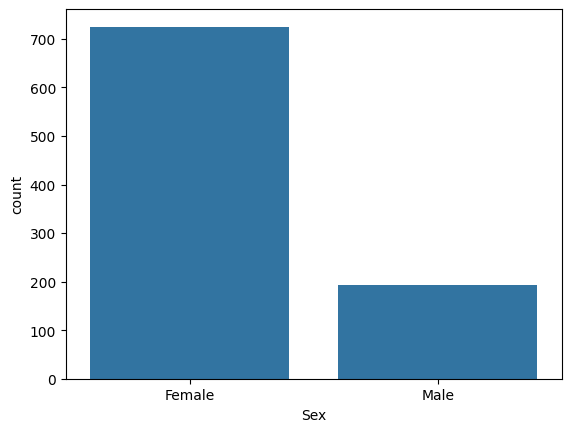

In [9]:
print('The number of male and female distribution in DataSet :')
print(df['Sex'].value_counts())
sns.countplot(data = df, x='Sex')
plt.xticks([0,1],['Female', 'Male'])

The distribution of Age in dataset :


<Axes: xlabel='Age', ylabel='Count'>

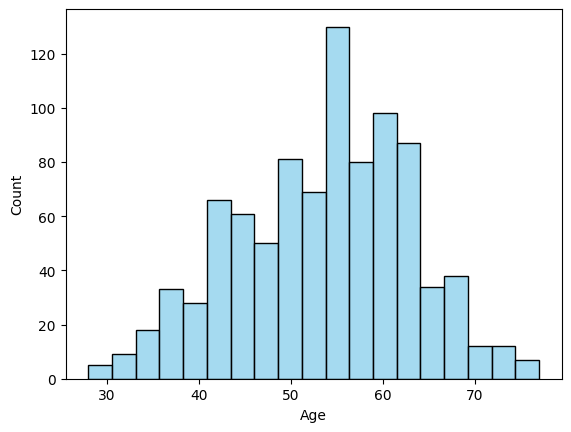

In [10]:
print('The distribution of Age in dataset :')
sns.histplot(data = df, x = 'Age', color = 'Skyblue')

The distribution of MaxHR in dataset :


<Axes: xlabel='MaxHR', ylabel='Count'>

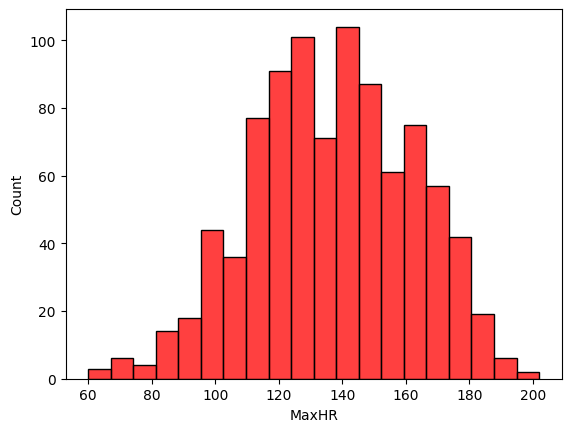

In [11]:
print('The distribution of MaxHR in dataset :')
sns.histplot(data = df, x = 'MaxHR', color = 'Red')

In [12]:
le = LabelEncoder()

In [13]:
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df['Sex'] = le.fit_transform(df['Sex'])

In [14]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


#### Checking the correlatoin matrix for finding the Feature variable. 

In [15]:
core = df.corr()

<Axes: >

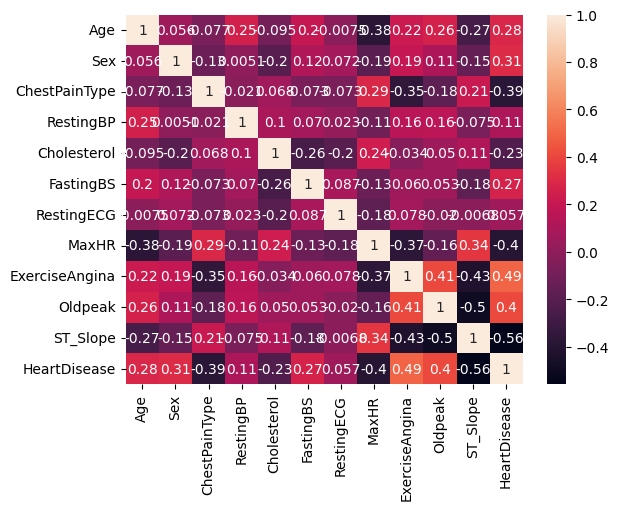

In [16]:
sns.heatmap(data = core, annot = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


#### Taking the Feature variable in X and Target variable in Y
###### After understanding the Correlation matrix found Age, sex, MaxHR, ExerciseAngina, Oldpeak & St_sleap has high impact on for taget variable, since hte correlation lies around 0.5 to 0.3

In [20]:
x = df.iloc[:,np.r_[0:2,7:11]]

In [21]:
x

,Age,Sex,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,172,0,0.0,2
1,49,0,156,0,1.0,1
2,37,1,98,0,0.0,2
3,48,0,108,1,1.5,1
4,54,1,122,0,0.0,2
...,...,...,...,...,...,...
913,45,1,132,0,1.2,1
914,68,1,141,0,3.4,1
915,57,1,115,1,1.2,1
916,57,0,174,0,0.0,1


In [22]:
y = df['HeartDisease']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [24]:
from sklearn.linear_model import LogisticRegression

#### In this we are going to find the suitable model with high accuracy. 
##### 1) Logistic Regression
##### 2) DecisionTree Regressor
##### 3) Naive Bayes
##### 4) KNeighbors
##### 5) XGBOOST

##### Fitting the model with Logistic Regression

In [50]:
modellogistic = LogisticRegression(max_iter = 10000)
modellogistic.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [52]:
y_pred_logistic = modellogistic.predict(x_test)

##### We have predicted the y using X test and we are checking with Classification report from SKlearn

In [53]:
logistic_regression_score = classification_report(y_pred_logistic, y_test)
print(logistic_regression_score)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        74
           1       0.92      0.92      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



##### Fitting the Model with DecisionTreeRegressor and checking the classification report

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
model_decision_tree = DecisionTreeClassifier() 
model_decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
y_pred_decision_tree = model_decision_tree.predict(x_test)

#### Checking the Classification report of Decision Tree Regressor

In [61]:
decision_tree_classification_report = classification_report(y_pred_decision_tree, y_test)
print(decision_tree_classification_report)

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        78
           1       0.78      0.81      0.80       106

    accuracy                           0.76       184
   macro avg       0.76      0.75      0.75       184
weighted avg       0.76      0.76      0.76       184



##### Fitting the model with Random Forest Classifier and finding the accuracy

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model_random_forest = RandomForestClassifier()
model_random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
y_pred_random_forest = model_random_forest.predict(x_test)

In [38]:
random_forest_classification_report = classification_report(y_pred_random_forest,y_test)
print(random_forest_classification_report)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        71
           1       0.88      0.86      0.87       113

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



##### Fitting the model with Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(x_train,y_train)

GaussianNB()

In [41]:
y_pred_naive_bayes = model_naive_bayes.predict(x_test)
naive_bayes_classification_report = classification_report(y_pred_naive_bayes,y_test)
print(naive_bayes_classification_report)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        74
           1       0.89      0.89      0.89       110

    accuracy                           0.87       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
model_kneighbors = KNeighborsClassifier()
model_kneighbors.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
y_pred_neighbors = model_kneighbors.predict(x_test)
kn_classification_report = classification_report(y_pred_neighbors, y_test)
print(kn_classification_report)

              precision    recall  f1-score   support

           0       0.62      0.65      0.63        71
           1       0.77      0.75      0.76       113

    accuracy                           0.71       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.71      0.71      0.71       184



##### Checking the model with XGBOOST

In [45]:
import xgboost as xgb

In [46]:
xgb_model = xgb.XGBClassifier(use_label_encoder = False, eval_matrics = 'log_loss')
xgb_model.fit(x_train,y_train)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:13:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_matrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_matrics='log_loss',
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [47]:
y_pred_xgb_model = xgb_model.predict(x_test)
xgb_classification_report = classification_report(y_pred_xgb_model, y_test)
print(xgb_classification_report)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        74
           1       0.85      0.85      0.85       110

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [64]:
models = {'Logistic Regression' : LogisticRegression(max_iter=1000),
          'Random Forest': RandomForestClassifier(),
          'Decision Tree' : DecisionTreeClassifier(),
          'Naive Bayes': GaussianNB(),
          'KNeighbors': KNeighborsClassifier(),
          'XGBOOST':xgb.XGBClassifier(use_label_encoder = False, eval_matrics = 'log_loss')}

results = []

for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

    results.append([name, accuracy, f1, roc_auc])

results_df = pd.DataFrame(results,columns=["Model", "Accuracy", "F1 Score", "ROC AUC"])
results_df = results_df.sort_values(by='ROC AUC', ascending = False).reset_index(drop=True)
print(results_df)

                 Model  Accuracy  F1 Score   ROC AUC
0  Logistic Regression  0.902174  0.918182  0.930344
1          Naive Bayes  0.869565  0.890909  0.927518
2        Random Forest  0.836957  0.864865  0.916462
3              XGBOOST  0.826087  0.854545  0.892875
4        Decision Tree  0.766304  0.803653  0.758108
5           KNeighbors  0.711957  0.762332  0.755651


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:49:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_matrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


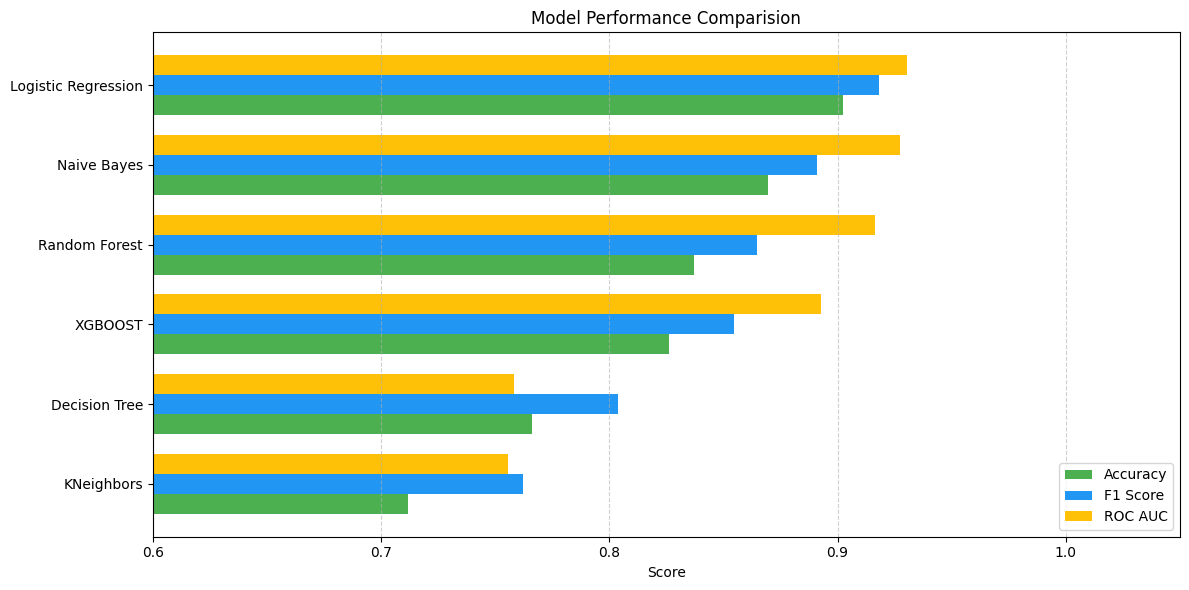

In [70]:
df = results_df.sort_values(by='ROC AUC', ascending = True).reset_index(drop =True)

models = df['Model']
accuracy = df['Accuracy']
f1 = df['F1 Score']
roc_auc = df['ROC AUC']

bar_width = 0.25
x = np.arange(len(models))

plt.figure(figsize=(12,6))

acc_bars = plt.barh(x - bar_width, accuracy, height = bar_width, label = 'Accuracy', color = '#4CAF50')
f1_bars = plt.barh(x, f1, height = bar_width, label = 'F1 Score', color = '#2196F3')
roc_bars = plt.barh(x + bar_width, roc_auc, height = bar_width, label = 'ROC AUC', color = '#FFC107')

plt.yticks(x, models)
plt.xlabel('Score')
plt.title('Model Performance Comparision')
plt.xlim(0.6, 1.05)
plt.grid(axis = 'x', linestyle ='--', alpha = 0.6)
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()
